


Regression analysis is a basic yet powerful tool in the field of statistics and machine learning that allows us to probe in and model the the relationship between one or more independent variables and a dependent variable. Here, we shall take a look at linear and non-linear regression and the differences in performance.

In order to elucidate, we shall use the [USA Housing Prices dataset](https://www.kaggle.com/datasets/kanths028/usa-housing/) from Kaggle. However, before we get our hands dirty into the math and code, let us load our dataset and perform some exploratory data analysis.

## Data Loading and EDA

In the python cells below, we shall call the necessary libraries to perform our analysis. Further, we shall first call our dataset and explore its characteristics to inspect it.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# Fancy plots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [113]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [114]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [115]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [116]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Let us see now plot the data and see if there exists any pairwise relationship in our data.

In [117]:
USAhousing.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

In [118]:
USAhousing.hvplot.scatter(x='Avg. Area House Age', y='Price')

:Scatter   [Avg. Area House Age]   (Price)

In [119]:
USAhousing.hvplot.scatter(x='Avg. Area Income', y='Price')

:Scatter   [Avg. Area Income]   (Price)

<Axes: >

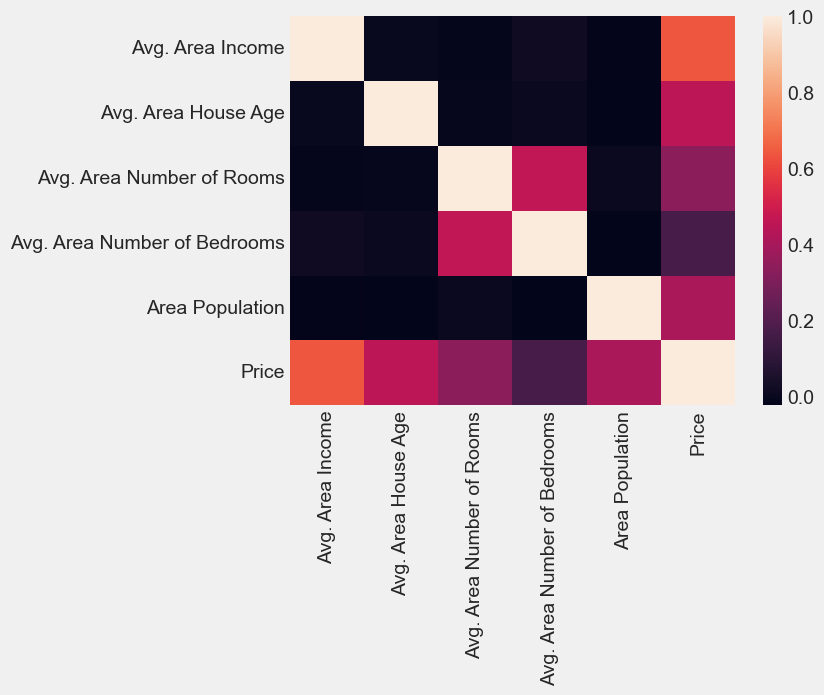

In [120]:
## Drop address column
USAHousingAddressDropped = USAhousing.drop('Address', axis=1)

# Visualise a pairwise correlation of every column (if exists)
sns.heatmap(USAHousingAddressDropped.corr())

# A Linear Regression Model

Now that we have inspected our data and have carried out our EDA, we shall begin to find ways to see if there exists any linear relationships between the data. Our primary focus of this dataset is the price. We need to see if there exists any relationship between the price of the house in contrast to the other columns of the dataset. This forces us to split our model into two arrays. We will use the values in one array $X$, representing the average area income, average area house age, average number of rooms in the area, average number of bedrooms and the area population to predict the price in $y$. Fundamentally, here we hypothesize that a linear relationship exists among the variables in either array. This sets the stage for linear regression.

## Nailing down the basics

Linear regression is a fundamental statistical technique that plays a pivotal role in data analysis, predictive modeling, and machine learning. It serves as a foundation for understanding the relationship between variables and making predictions based on that relationship. In this article, we will explore the mathematical background of linear regression, helping you grasp the core concepts behind this powerful tool.

Linear regression aims to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. This equation takes the form:
\begin{equation}
    \hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n + \varepsilon
\end{equation}
where $x_i$ is the $i^{th}$ independent variable, $b_i$ is the coefficient of the $i^{th}$ independent variable, and $\varepsilon$ represents the error term i.e. the difference between the predicted and the actual values.

The goal of linear regression is to estimate the values of $b_1, b_2 \ldots b_n$ and $a$ that best fit the data at hand. We can determine these values using the mean squared error estimation method. This can be done by to fit the data as follows:

\begin{equation}
    \min \limits_{\mathbf{b}} \frac 1n S(\mathbf{b}) = \frac 1n \sum \limits_{i=1}^n (y_i - \hat{y_i})^2 = \frac 1n \sum \limits_{i=1}^n e_i^2,
\end{equation}

where for each $1 \leq i \leq n$,

\begin{equation}
    \hat{y}_i = \hat{b_0} + \hat{b_1} x_{i1} + \ldots + \hat{b_n}x_{in}
\end{equation}

Now, let $\mathbf{e} = (e_i) \in \mathbb{R}$ and $\hat{\mathbf{y}} = (\hat{y_i}) = \mathbf{X \hat{b}} \in \mathbb{R}^n$. Then $\mathbb{e = y - \hat{y}}$. This boils the above problem to the following:

\begin{equation}
    \min \limits_{\mathbf{\hat{b}}} \frac 1n S (\mathbf{\hat{b}}) = \frac 1n ||\mathbf{e}||^2 = \frac 1n || \mathbf{y - X \hat{b}} ||^2.
\end{equation}

Besides, this methodology, we shall apply two more methods to evaluate our regression problem:

- Absolute Error (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|.$$
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}.$$

Together, these three functions shall serve as our loss functions. However, as we have seen, the goal shall remain the same: We need to minimize the loss function.

In [121]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']


Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Here we shall add a little bit of preprocessing by scaling and shifting the values in our dataset to constitute that of a standard normal distribution with mean 0 and variance 1. After this step we shall add them to our ```pipeline``` which shall help us plan out this entire study.

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Here, we shall invoke the ```LinearRegression()``` method that calls upon the linear regressor and have that trained on our dataset $X$ with our target values for $y$.

In [125]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()



Now, let's evaluate the model by checking out it's coefficients and how we can interpret them. We begin by printing our $y$-intercept, i.e. our value for $b_0$ as follows:

In [126]:
# print the intercept
print(lin_reg.intercept_)

1228219.1492415662


These are the values for $b_1, \ldots, b_n$ which are our regression coefficients for average area's income, average area's house age, average areas number of rooms, average number of bedrooms and population for the area.

In [127]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


 Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in ```Avg. Area Income``` is associated with an increase of &#36;  21.52
- Holding all other features fixed, a 1 unit increase in ```Avg. Area House Age``` is associated with an increase of &#36; 164883.28.
- Holding all other features fixed, a 1 unit increase in ```Avg. Area Number of Rooms``` is associated with an increase of &#36; 122368.67.
- Holding all other features fixed, a 1 unit increase in ```Avg. Area Number of Bedrooms``` is associated with an increase of &#36; 2233.80.
- Holding all other features fixed, a 1 unit increase in ```Area Population``` is associated with an increase of &#36; 15.15.

Now that we have trained our model to the dataset and have obtained the values of $b_0 \ldots b_n$, let's grab predictions off our test set and see how well it did!

In [128]:
pred = lin_reg.predict(X_test)

In [129]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histogram**

Let's see how our errors pan out.

In [130]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

Let's see the optimal values that we had for the Root Mean Square Error, Mean Squared Error and Mean Absolute Error when training as well as testing.

In [131]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


## Ridge and Lasso Regression

Before diving into Ridge and Lasso, let's understand why we need these regularization techniques in the first place. In a standard linear regression model, we aim to find the coefficients for each predictor variable that minimize the sum of squared residuals. The problem arises when we have many predictor variables or when some of them are highly correlated. In such cases, the model tends to overfit, resulting in poor generalization to new, unseen data. Overfitting is a common problem in machine learning. It occurs when a model fits the training data so closely that it captures noise rather than the underlying relationships in the data. As a result, the model performs poorly on unseen data, a situation known as poor generalization.

Regularization methods introduce a penalty term to the traditional least squares objective function, discouraging the model from assigning high values to the coefficients of predictor variables. Ridge and Lasso are two popular regularization techniques that help us tackle these issues. Ridge and Lasso regression are both linear regression techniques that combat overfitting by adding a regularization term to the linear regression cost function. This regularization term is based on Tikhonov regularization, named after the Russian mathematician Andrey Tikhonov. Tikhonov regularization, also known as L2 regularization, minimizes the sum of the squared coefficients, adding a penalty term to the cost function.

The cost function for ridge regression is expressed as follows:
\begin{equation}
    J(b) = MSE + \alpha \sum \limits_{i=1}^n b_i^2,
\end{equation}

where $J(\beta)$ is the cost function, $\alpha$  is the regularization parameter that controls the strength of the regularization, $b_i$ are the model coefficients and MSE is the Mean Squared Error, measuring the model's error on the training data.

On the other hand, Lasso regression (Least Absolute Shrinkage and Selection Operator) uses L1 regularization, which minimizes the absolute values of the coefficients and can lead to sparsity (i.e., some coefficients being exactly zero). The Lasso cost function is expressed as:

\begin{equation}
    J(b) = MSE + \alpha \sum \limits_{i=1}^n |b_i|.
\end{equation}



Lets apply the theory above into practice by calling a ```Ridge``` object from ```scikit-learn``` for Ridge regression and fitting it to our dataset. We then evaluate the model using the same metrics of MAE, MSE, etc. and append it to a resultant dataframe for future reference.

In [132]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
#
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
#
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
#
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df = pd.concat([results_df, results_df_2])
results_df

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.89261
RMSE: 100763.43533689495
R2 Square 0.9139628674464607
__________________________________
Train set evaluation:
_____________________________________
MAE: 81972.39058585512
MSE: 10382929615.14346
RMSE: 101896.66145239233
R2 Square 0.9185464334441484
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


We do the same for the Lasso regression model by calling in a ```Lasso``` object from ```scikit-learn``` for our needs.

In [133]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2])

results_df

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364521
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


# Polynomial Regression

While linear regression is effective for modeling simple relationships, many real-world scenarios exhibit more complex patterns. Polynomial regression addresses this by introducing higher-degree polynomial equations. The general form of a polynomial regression equation of degree can can be written as:

\begin{equation}
    y = b_0 + b_1 X + b_2 X^2 + \ldots + b_n X^n + \varepsilon,
\end{equation}

where $X_i$ is the $i^{th}$ independent variable, $b_i$ is the coefficient of the $i^{th}$ independent variable, and $\varepsilon$ represents the error term i.e. the difference between the predicted and the actual values.

Just like linear regression, polynomial regression models should be evaluated for their accuracy and performance. Techniques such as R-squared (coefficient of determination) and adjusted R-squared, as well as cross-validation methods, help assess the model's goodness of fit and prevent overfitting. The optimization problem remains the same as in the case of linear regression as we use the same loss functions.

We will put this theory into practice by transforming the features and raising them to their polynomial exponent and using a linear regressor to fit the data.

In [134]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2])
results_df

Test set evaluation:
_____________________________________
MAE: 81174.51844119697
MSE: 10081983997.620695
RMSE: 100409.08324260656
R2 Square 0.914566932419506
__________________________________
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007816
RMSE: 101323.67517519198
R2 Square 0.9194599187853729
__________________________________


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Polynomial Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


# Models Comparison

In [138]:
results_df_arr = results_df['Model'].to_numpy()
results_df_MAE = results_df['MAE'].to_numpy()
results_df_MSE = results_df['MSE'].to_numpy()
results_df_RMSE = results_df['RMSE'].to_numpy()

In [136]:
plt.plot(results_df_arr, )

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Polynomial Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


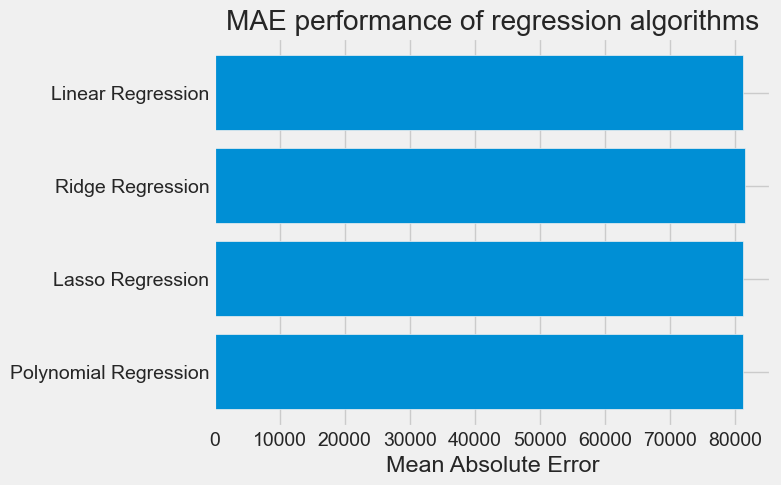

In [169]:
fig, ax = plt.subplots()

hbar = plt.barh(results_df_arr, results_df_MAE, align='center')
ax.invert_yaxis()
ax.set_xlabel('Mean Absolute Error')
ax.set_title('MAE performance of regression algorithms')

plt.show()

Text(0.5, 1.0, 'MSE performance of regression algorithms')

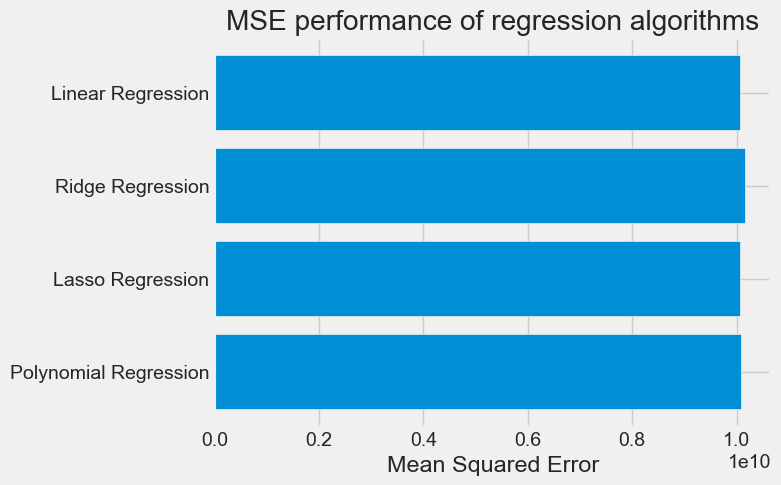

In [170]:
fig, ax = plt.subplots()
plt.barh(results_df_arr, results_df_MSE)
ax.invert_yaxis()
ax.set_xlabel('Mean Squared Error')
ax.set_title('MSE performance of regression algorithms')


Text(0.5, 1.0, 'RMSE performance of regression algorithms')

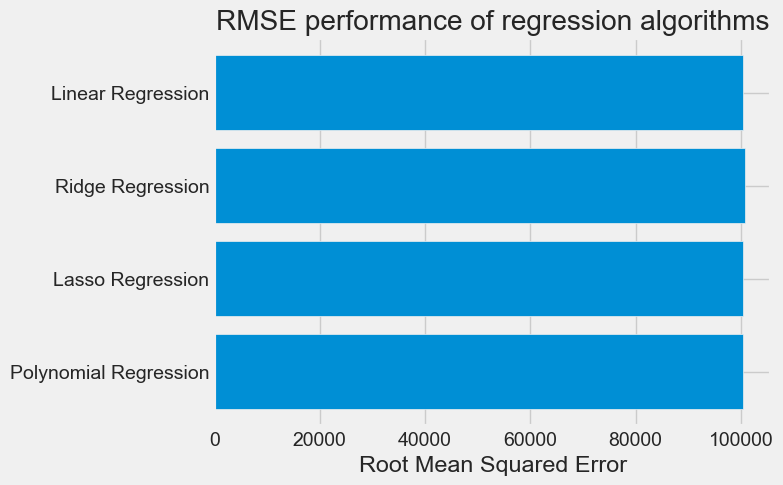

In [171]:
fig, ax = plt.subplots()
plt.barh(results_df_arr, results_df_RMSE)
ax.invert_yaxis()
ax.set_xlabel('Root Mean Squared Error')
ax.set_title('RMSE performance of regression algorithms')

Therefore, in this blogpost we have learnt and compared against the Linear regression, the Ridge and Lasso regression, and polynomial regression.